## Hastalık Tanımı
Diyabet, hastalarda bazı göz bozukluklarına zemin hazırlar. Örneğin göz tansiyonu (glokom) ve katarakt (göz merceğinin bulanıklaşması) şeker hastalarında normalden iki kat fazla görülmektedir. Fakat en önemli göz bozukluğu diyabete bağlı retinopati’dir. Diyabete bağlı retinopati (Diyabetik retinopati = Kısaca DR), tüm dünyada görme kaybı yapan nedenlerin başında gelmektedir. 
 
Normal (N)(Normal),

Diabetes (D)(Diyabet),

Glaucoma (G)(Glokom ),

Cataract (C)(Katarakt)

"N":0,"C":1,"D":2,"G":3


## Google Colab Kimlik Doğrulama Adımı

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Kütüphanelerin kullanılmak üzere içeri aktarılması

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import os
from collections import Counter

import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,AveragePooling2D
from keras.layers import Input, Add,Activation, BatchNormalization
from tensorflow.keras.utils import plot_model

# Verinin Yüklenmesi

In [3]:
filepath = r"/gdrive/My Drive/Bitirme_2/OnIslenmisDataSetleri_2/"

def data_load(method_name):
  global filepath
  
  X_train_oversampling = np.load(filepath+"X_train_{}.npy".format(method_name))
  y_train_oversampling= np.load(filepath+"y_train_{}.npy".format(method_name))
  
  X_test = np.load(filepath+"X_test.npy")
  y_test = np.load(filepath+"y_test.npy")

  return X_train_oversampling,y_train_oversampling,X_test,y_test


In [4]:
X_train_oversampling,y_train_oversampling,X_test,y_test = data_load("adasyn")

In [5]:
print(X_train_oversampling.shape)
print(y_train_oversampling.shape)

print(X_test.shape)
print(y_test.shape)

(3120, 224, 224, 3)
(3120, 4)
(534, 224, 224, 3)
(534, 4)


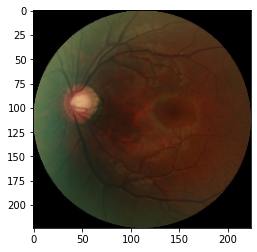

In [6]:
import matplotlib.pyplot as plt
image=X_train_oversampling[1]
plt.imshow(image)
plt.show()

In [7]:
y_train_oversampling

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [8]:
class_size = 4

# MODEL OLUŞTURMA

In [ ]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import import_ipynb

In [ ]:
os.chdir("/gdrive/My Drive/Bitirme_2/")

In [ ]:
!ls

1.adasyn_VeriOnIsleme_DiyabeteBagliGözHastaliklariTespiti.ipynb
2_adasyn_DiyabeteBagliGözHastaliklariTespiti.ipynb
EgitilmisModeller_2
GetModel.ipynb
ModelGecmisleri_2
OnIslenmisDataSetleri_2


In [ ]:
from GetModel import *

importing Jupyter notebook from GetModel.ipynb


In [ ]:
# ---- Alexnet -----
def get_Alexnet_model():
    global class_size
    return AlexNet(class_size)

def get_Alexnet_model2():
    global class_size
    return AlexNet2(class_size)
"""
# ---- ResNet50 -----

def get_ResNet50_model3():
  global class_size
  return ResNet50_model3(class_size)

# ----- VGG16 ------

def get_VGG16():
  global class_size
  return VGG16(class_size)
"""

'\n# ---- ResNet50 -----\n\ndef get_ResNet50_model3():\n  global class_size\n  return ResNet50_model3(class_size)\n\n# ----- VGG16 ------\n\ndef get_VGG16():\n  global class_size\n  return VGG16(class_size)\n'

# Eğitilen Modelin Kaydedilmesi ve Geri Yüklenmesi

In [9]:
import keras

In [10]:
def model_save(model,model_name):
    filepath = r"/gdrive/My Drive/Bitirme_2/EgitilmisModeller_2/{}.h5".format(model_name)
    model.save(filepath) 

def model_load(model_name):
  filepath = r"/gdrive/My Drive/Bitirme_2/EgitilmisModeller_2/{}.h5".format(model_name)
  return keras.models.load_model(filepath)

# Model eğitim geçmişindeki (acc-loss) değerlerini grafik ile çizdirilmesi

In [11]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns  #Seaborn, güzel görünen ve bilgilendirici istatistiksel grafikler çizmek için üst düzey bir arayüz sağlar.

def history_summary(hist):
    sns.set() #default 
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history['val_accuracy'])
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
    plt.show()

# Model eğitim geçmişinin csv olarak kaydedilmesi ve geri yüklenmesi

In [12]:
import pandas as pd
# histroy nin kaydedilmesi
def history_save(history_name,history):
  name = "/gdrive/My Drive/Bitirme_2/ModelGecmisleri_2/{}".format(history_name)
  hist_df = pd.DataFrame(history.history) 
  hist_df.to_csv(name+'.csv',index = False)
  
def history_load(history_name):
  history=pd.read_csv("/gdrive/My Drive/Bitirme_2/ModelGecmisleri_2/{}.csv".format(history_name))
  return history


# Eğitilen Modelin test verisi için classification_report  ve confusion_matrix in çizdirilmesi


In [13]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_and_classification_report(model):
  global X_test,y_test
  y_pred = model.predict(X_test, verbose=1)
  y_pred = np.argmax(y_pred, axis=1)
  target_names = ['Normal','Katarakt','D.Retinopati','Glokom']
  print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

  cf_matrix = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
  print(cf_matrix,"\n")
  ax = sns.heatmap(cf_matrix, annot=True,fmt="d", cmap='Blues')
  ax.set_title('Confusion Matrix');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actal Values');
  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(target_names)
  ax.yaxis.set_ticklabels(target_names)
  ## Display the visualization of the Confusion Matrix.
  plt.show()


# YSA Modelinin Derlenmesi ve Eğitilmesi

optimizer: ağırlık katsayılarının güncellenmesi için kullanılacak optimizasyon yöntemi

loss ; başarıya giderken geriye giderken hesaplama için

metrics başarı metriği olarak accuracy kullanıldı

In [14]:
from tensorflow.keras import optimizers

## AlexNet modellinin farklı parametrelerle eğitilmesi

### 1- AlexNet - SGD

In [ ]:
alexnet_1 = get_Alexnet_model2()
# categorical_crossentropy 
alexnet_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

alexNet_1_history = alexnet_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
78/78 [==============================] - 16s 48ms/step - loss: 1.2589 - accuracy: 0.4671 - val_loss: 1.4528 - val_accuracy: 0.0000e+00
Epoch 2/20
78/78 [==============================] - 3s 37ms/step - loss: 1.1283 - accuracy: 0.5180 - val_loss: 1.6203 - val_accuracy: 0.0000e+00
Epoch 3/20
78/78 [==============================] - 3s 35ms/step - loss: 1.0803 - accuracy: 0.5325 - val_loss: 1.7112 - val_accuracy: 0.0016
Epoch 4/20
78/78 [==============================] - 3s 35ms/step - loss: 1.0363 - accuracy: 0.5725 - val_loss: 1.7785 - val_accuracy: 0.0657
Epoch 5/20
78/78 [==============================] - 3s 36ms/step - loss: 1.0040 - accuracy: 0.5925 - val_loss: 1.6225 - val_accuracy: 0.2724
Epoch 6/20
78/78 [==============================] - 3s 36ms/step - loss: 0.9660 - accuracy: 0.6014 - val_loss: 1.1771 - val_accuracy: 0.4968
Epoch 7/20
78/78 [==============================] - 3s 36ms/step - loss: 0.9509 - accuracy: 0.6154 - val_loss: 0.4844 - val_accuracy: 0.8365
Epoc

In [ ]:
# Değerlendirme
loss_1,accuracy_1 = alexnet_1.evaluate(X_test,y_test)

17/17 [==============================] - 1s 32ms/step - loss: 0.9998 - accuracy: 0.5861


In [ ]:
history_save("alexNet_1_history",alexNet_1_history)
model_save(alexnet_1,"alexnet_1_224_224_3")

17/17 [==============================] - 10s 28ms/step
              precision    recall  f1-score   support

      Normal       0.66      0.64      0.65       264
    Katarakt       0.56      0.82      0.67       128
D.Retinopati       0.12      0.19      0.15        27
      Glokom       0.67      0.29      0.40       115

    accuracy                           0.59       534
   macro avg       0.50      0.48      0.47       534
weighted avg       0.61      0.59      0.58       534

[[170  59  20  15]
 [ 17 105   5   1]
 [ 20   2   5   0]
 [ 51  20  11  33]] 



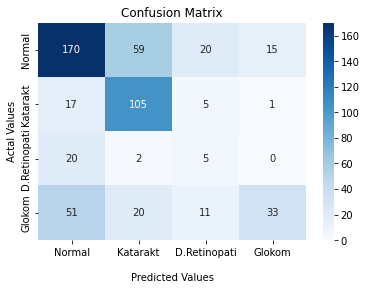

In [15]:
alexnet_1 = model_load("alexnet_1_224_224_3")
confusion_matrix_and_classification_report(alexnet_1)

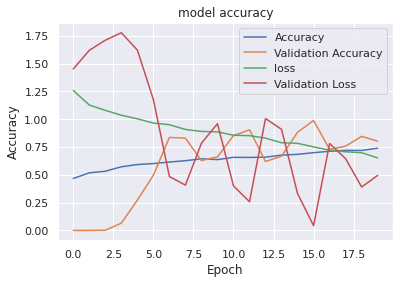

In [ ]:
history_summary(alexNet_1_history)

In [ ]:
h=history_load("alexNet_1_history")

In [ ]:
h.head()

,loss,accuracy,val_loss,val_accuracy
0,1.258921,0.467147,1.452770,0.000000
1,1.128267,0.518029,1.620338,0.000000
2,1.080258,0.532452,1.711232,0.001603
3,1.036283,0.572516,1.778451,0.065705
4,1.004012,0.592548,1.622477,0.272436


### 2 - AlexNet - rmsprop

In [ ]:
alexnet_2 = get_Alexnet_model2()

alexnet_2.compile(optimizer = optimizers.RMSprop(),#learning_rate=0.001
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

alexNet_2_history = alexnet_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 5s 47ms/step - loss: 3.5156 - accuracy: 0.4287 - val_loss: 1.7733 - val_accuracy: 0.0000e+00
Epoch 2/20
78/78 [==============================] - 3s 40ms/step - loss: 1.3353 - accuracy: 0.4748 - val_loss: 1.7501 - val_accuracy: 0.0369
Epoch 3/20
78/78 [==============================] - 3s 41ms/step - loss: 1.2930 - accuracy: 0.4832 - val_loss: 1.7956 - val_accuracy: 0.0000e+00
Epoch 4/20
78/78 [==============================] - 3s 41ms/step - loss: 1.2737 - accuracy: 0.4936 - val_loss: 1.1305 - val_accuracy: 0.3558
Epoch 5/20
78/78 [==============================] - 3s 41ms/step - loss: 1.2036 - accuracy: 0.5104 - val_loss: 0.9597 - val_accuracy: 0.6074
Epoch 6/20
78/78 [==============================] - 3s 41ms/step - loss: 1.2326 - accuracy: 0.5100 - val_loss: 0.7795 - val_accuracy: 0.5625
Epoch 7/20
78/78 [==============================] - 3s 41ms/step - loss: 1.2528 - accuracy: 0.5180 - val_loss: 0.1139 - val_accuracy: 0.9583
Epoch

In [ ]:
loss_2,accuracy_2 = alexnet_2.evaluate(X_test,y_test)

17/17 [==============================] - 0s 15ms/step - loss: 0.9877 - accuracy: 0.5843


In [ ]:
history_save("alexNet_2_history",alexNet_2_history)
model_save(alexnet_2,"alexnet_2_224_224_3")

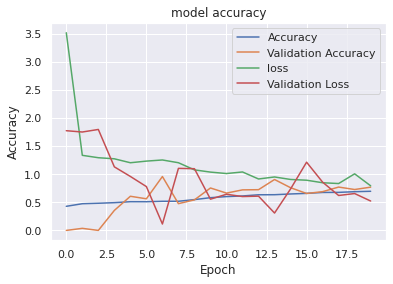

In [ ]:
history_summary(alexNet_2_history)

17/17 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.61      0.72      0.66       264
    Katarakt       0.56      0.87      0.68       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.71      0.10      0.18       115

    accuracy                           0.58       534
   macro avg       0.47      0.42      0.38       534
weighted avg       0.59      0.58      0.53       534

[[189  67   3   5]
 [ 17 111   0   0]
 [ 26   1   0   0]
 [ 80  19   4  12]] 



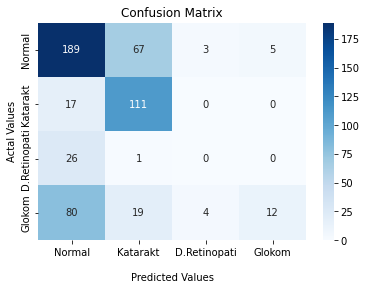

In [16]:
alexnet_2 = model_load("alexnet_2_224_224_3")
confusion_matrix_and_classification_report(alexnet_2)

### 3 - AlexNet - Adam

In [ ]:
alexnet_3 = get_Alexnet_model2()

alexnet_3.compile(optimizer = optimizers.Adam(),#learning_rate=0.001
                loss='categorical_crossentropy',
                metrics=['accuracy'])

alexNet_3_history = alexnet_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 4s 43ms/step - loss: 1.3484 - accuracy: 0.4623 - val_loss: 1.6294 - val_accuracy: 0.0000e+00
Epoch 2/20
78/78 [==============================] - 3s 41ms/step - loss: 1.2065 - accuracy: 0.4972 - val_loss: 1.1314 - val_accuracy: 0.3958
Epoch 3/20
78/78 [==============================] - 3s 37ms/step - loss: 1.2709 - accuracy: 0.4595 - val_loss: 1.2879 - val_accuracy: 0.3029
Epoch 4/20
78/78 [==============================] - 3s 36ms/step - loss: 1.1843 - accuracy: 0.4944 - val_loss: 0.3838 - val_accuracy: 0.8974
Epoch 5/20
78/78 [==============================] - 3s 36ms/step - loss: 1.1535 - accuracy: 0.5108 - val_loss: 1.0824 - val_accuracy: 0.3510
Epoch 6/20
78/78 [==============================] - 3s 36ms/step - loss: 1.1200 - accuracy: 0.5120 - val_loss: 1.0030 - val_accuracy: 0.4792
Epoch 7/20
78/78 [==============================] - 3s 37ms/step - loss: 1.0882 - accuracy: 0.5317 - val_loss: 0.8220 - val_accuracy: 0.7163
Epoch 8/2

In [ ]:
loss_3,accuracy_3 = alexnet_3.evaluate(X_test,y_test)

17/17 [==============================] - 0s 20ms/step - loss: 0.9914 - accuracy: 0.6161


In [ ]:
history_save("alexNet_3_history",alexNet_3_history)
model_save(alexnet_3,"alexnet_3_224_224_3")

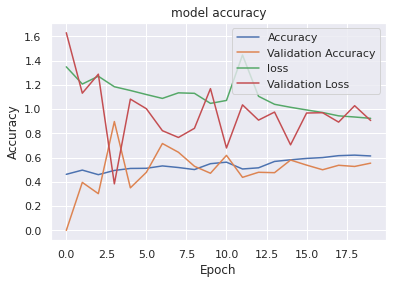

In [ ]:
history_summary(alexNet_3_history)

17/17 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

      Normal       0.58      0.91      0.71       264
    Katarakt       0.82      0.54      0.65       128
D.Retinopati       0.29      0.07      0.12        27
      Glokom       0.58      0.16      0.25       115

    accuracy                           0.62       534
   macro avg       0.57      0.42      0.43       534
weighted avg       0.62      0.62      0.57       534

[[240  11   3  10]
 [ 58  69   0   1]
 [ 22   1   2   2]
 [ 92   3   2  18]] 



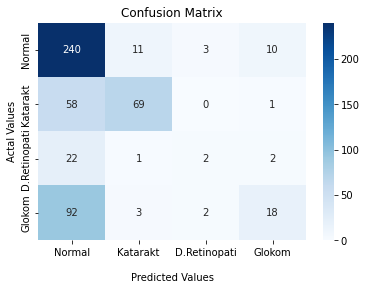

In [17]:
alexnet_3 = model_load("alexnet_3_224_224_3")
confusion_matrix_and_classification_report(alexnet_3)

### 4 - AlexNet - Adadelta

In [ ]:
alexnet_5 = get_Alexnet_model2()

alexnet_5.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adadelta(),
              metrics=['accuracy'])

alexNet_5_history = alexnet_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 17s 50ms/step - loss: 1.3493 - accuracy: 0.3157 - val_loss: 1.3723 - val_accuracy: 0.0000e+00
Epoch 2/20
78/78 [==============================] - 3s 38ms/step - loss: 1.2932 - accuracy: 0.4475 - val_loss: 1.3720 - val_accuracy: 0.0000e+00
Epoch 3/20
78/78 [==============================] - 3s 37ms/step - loss: 1.2519 - accuracy: 0.4936 - val_loss: 1.3844 - val_accuracy: 0.0000e+00
Epoch 4/20
78/78 [==============================] - 3s 37ms/step - loss: 1.2202 - accuracy: 0.4988 - val_loss: 1.3855 - val_accuracy: 0.0465
Epoch 5/20
78/78 [==============================] - 3s 37ms/step - loss: 1.1903 - accuracy: 0.5044 - val_loss: 1.3178 - val_accuracy: 0.2788
Epoch 6/20
78/78 [==============================] - 3s 37ms/step - loss: 1.1643 - accuracy: 0.5120 - val_loss: 1.1929 - val_accuracy: 0.3990
Epoch 7/20
78/78 [==============================] - 3s 37ms/step - loss: 1.1498 - accuracy: 0.5128 - val_loss: 1.0455 - val_accuracy: 0.4760


In [ ]:
loss_5,accuracy_5 = alexnet_5.evaluate(X_test,y_test)

17/17 [==============================] - 1s 47ms/step - loss: 1.0682 - accuracy: 0.5618


In [ ]:
history_save("alexNet_5_history",alexNet_5_history)
model_save(alexnet_5,"alexnet_5_224_224_3")

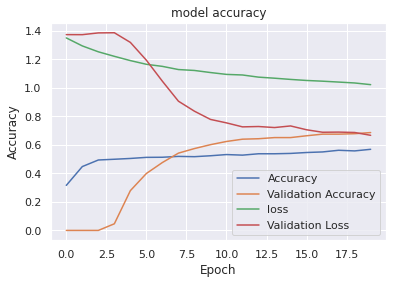

In [ ]:
history_summary(alexNet_5_history)

17/17 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.56      0.90      0.69       264
    Katarakt       0.82      0.28      0.42       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.41      0.23      0.29       115

    accuracy                           0.56       534
   macro avg       0.45      0.35      0.35       534
weighted avg       0.56      0.56      0.51       534

[[238   2   1  23]
 [ 77  36   1  14]
 [ 27   0   0   0]
 [ 81   6   2  26]] 



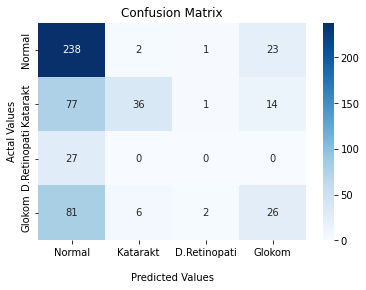

In [18]:
alexnet_5 = model_load("alexnet_5_224_224_3")
confusion_matrix_and_classification_report(alexnet_5)

### 5 - AlexNet - Adagrad

In [ ]:
alexnet_6 = get_Alexnet_model2()

alexnet_6.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adagrad(),
              metrics=['accuracy'])

alexNet_6_history = alexnet_6.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20 ,
                                  validation_split=0.20)

Epoch 1/20
78/78 [==============================] - 4s 41ms/step - loss: 1.2274 - accuracy: 0.4848 - val_loss: 1.4649 - val_accuracy: 0.0000e+00
Epoch 2/20
78/78 [==============================] - 3s 36ms/step - loss: 1.1241 - accuracy: 0.5176 - val_loss: 1.6318 - val_accuracy: 0.0000e+00
Epoch 3/20
78/78 [==============================] - 3s 36ms/step - loss: 1.0627 - accuracy: 0.5437 - val_loss: 1.7725 - val_accuracy: 0.0080
Epoch 4/20
78/78 [==============================] - 3s 35ms/step - loss: 1.0284 - accuracy: 0.5741 - val_loss: 1.7739 - val_accuracy: 0.1683
Epoch 5/20
78/78 [==============================] - 3s 36ms/step - loss: 0.9914 - accuracy: 0.6002 - val_loss: 1.4807 - val_accuracy: 0.3542
Epoch 6/20
78/78 [==============================] - 3s 36ms/step - loss: 0.9435 - accuracy: 0.6198 - val_loss: 1.1101 - val_accuracy: 0.4872
Epoch 7/20
78/78 [==============================] - 3s 38ms/step - loss: 0.9121 - accuracy: 0.6298 - val_loss: 0.8736 - val_accuracy: 0.5881
Epoch

In [ ]:
loss_6,accuracy_6 = alexnet_6.evaluate(X_test,y_test)

17/17 [==============================] - 0s 20ms/step - loss: 0.7707 - accuracy: 0.6723


In [ ]:
history_save("alexNet_6_history",alexNet_6_history)
model_save(alexnet_6,"alexnet_6_224_224_3")

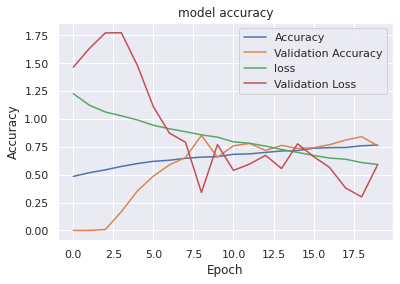

In [ ]:
history_summary(alexNet_6_history)

17/17 [==============================] - 1s 24ms/step
              precision    recall  f1-score   support

      Normal       0.68      0.76      0.72       264
    Katarakt       0.75      0.91      0.82       128
D.Retinopati       0.67      0.07      0.13        27
      Glokom       0.49      0.35      0.41       115

    accuracy                           0.67       534
   macro avg       0.65      0.52      0.52       534
weighted avg       0.66      0.67      0.65       534

[[201  26   1  36]
 [  7 116   0   5]
 [ 24   1   2   0]
 [ 63  12   0  40]] 



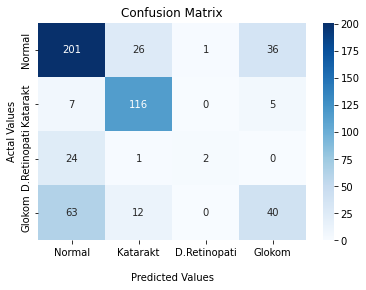

In [19]:
alexnet_6 = model_load("alexnet_6_224_224_3")
confusion_matrix_and_classification_report(alexnet_6)

## ResNet50  modellinin farklı parametrelerle eğitilmesi

224,224,3

In [ ]:
from tensorflow.keras.applications import ResNet50
def resnet50():
  global class_size
  base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
  for layer in base_model.layers:
    layer.trainable = False
  
  model = Sequential()
  model.add(base_model)
  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(class_size, activation='softmax'))
  return model

###1 - ResNet50 - SGD



In [ ]:
resnet_1 = resnet50()

resnet_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

resnet_1_history = resnet_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

94781440/94765736 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
78/78 [==============================] - 25s 154ms/step - loss: 2.0886 - accuracy: 0.4143 - val_loss: 1.3968 - val_accuracy: 0.0000e+00
Epoch 2/20
78/78 [==============================] - 10s 129ms/step - loss: 1.3110 - accuracy: 0.4335 - val_loss: 1.4520 - val_accuracy: 0.0000e+00
Epoch 3/20
78/78 [==============================] - 10s 129ms/step - loss: 1.3023 - accuracy: 0.4379 - val_loss: 1.3015 - val_accuracy: 0.0016
Epoch 4/20
78/78 [==============================] - 10s 130ms/step - loss: 1.2908 - accuracy: 0.4411 - val_loss: 1.3356 - val_accuracy: 0.0000e+00
Epoch 5/20
78/78 [==============================] - 10s 131ms/step - loss: 1.2803 - accuracy: 0.4435 - val_loss: 1.2915 - val_accuracy: 0.0785
Epoch 6/20
78/78 [==============================] - 10s 133ms/step - loss: 1.2684 - accuracy: 0.4531 - val_loss: 1.3089 - val_accuracy: 0.1603
Epoch 7/20
78/78 [==============================] - 11s 144ms/step - loss: 1.2550 - accuracy: 0.4679 - val_loss: 1.1327 - val_accu

In [ ]:
loss_7,accuracy_7 = resnet_1.evaluate(X_test,y_test)

17/17 [==============================] - 2s 142ms/step - loss: 1.1733 - accuracy: 0.5000


In [ ]:
history_save("resnet_1_history",resnet_1_history)
model_save(resnet_1,"resnet_1_224_224_3")

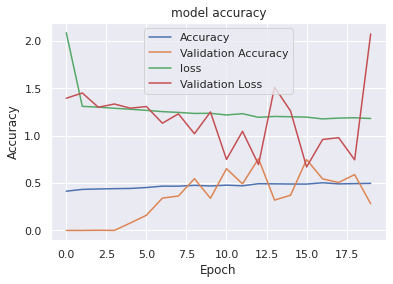

In [ ]:
history_summary(resnet_1_history)

17/17 [==============================] - 4s 128ms/step
              precision    recall  f1-score   support

      Normal       0.51      0.89      0.65       264
    Katarakt       0.42      0.26      0.32       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.50       534
   macro avg       0.23      0.29      0.24       534
weighted avg       0.36      0.50      0.40       534

[[234  30   0   0]
 [ 95  33   0   0]
 [ 24   3   0   0]
 [103  12   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


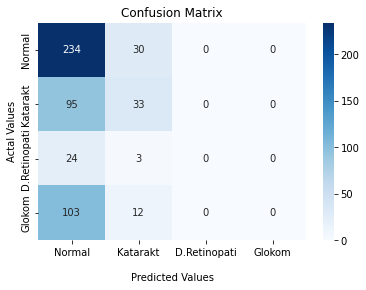

In [22]:
resnet_1 = model_load("resnet_1_224_224_3")
confusion_matrix_and_classification_report(resnet_1)

###2 - ResNet50 - rmsprop

In [ ]:
resnet_2 = resnet50()

resnet_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

resnet_2_history = resnet_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

94781440/94765736 [==============================] - 0s 0us/step
Epoch 1/20
78/78 [==============================] - 27s 175ms/step - loss: 27.7116 - accuracy: 0.3097 - val_loss: 52.9633 - val_accuracy: 0.0032
Epoch 2/20
78/78 [==============================] - 12s 152ms/step - loss: 11.3371 - accuracy: 0.3458 - val_loss: 25.7275 - val_accuracy: 0.0561
Epoch 3/20
78/78 [==============================] - 12s 151ms/step - loss: 7.5372 - accuracy: 0.3482 - val_loss: 23.3696 - val_accuracy: 0.0561
Epoch 4/20
78/78 [==============================] - 12s 152ms/step - loss: 5.7380 - accuracy: 0.3574 - val_loss: 8.7491 - val_accuracy: 0.2196
Epoch 5/20
78/78 [==============================] - 12s 153ms/step - loss: 3.9036 - accuracy: 0.3714 - val_loss: 1.1075 - val_accuracy: 0.5673
Epoch 6/20
78/78 [==============================] - 13s 163ms/step - loss: 2.6585 - accuracy: 0.3846 - val_loss: 2.7891 - val_accuracy: 0.3558
Epoch 7/20
78/78 [==============================] - 12s 154ms/step - los

In [ ]:
loss_8,accuracy_8 = resnet_2.evaluate(X_test,y_test)

17/17 [==============================] - 2s 135ms/step - loss: 1.3676 - accuracy: 0.3427


In [ ]:
history_save("resnet_2_history",resnet_2_history)
model_save(resnet_2,"resnet_2_224_224_3")

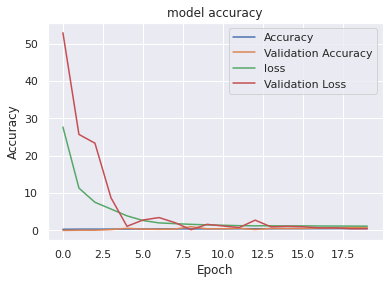

In [ ]:
history_summary(resnet_2_history)

17/17 [==============================] - 2s 95ms/step
              precision    recall  f1-score   support

      Normal       0.51      0.53      0.52       264
    Katarakt       0.54      0.17      0.26       128
D.Retinopati       0.05      0.33      0.08        27
      Glokom       0.46      0.10      0.17       115

    accuracy                           0.34       534
   macro avg       0.39      0.28      0.26       534
weighted avg       0.48      0.34      0.36       534

[[140  12 102  10]
 [ 56  22  46   4]
 [ 16   2   9   0]
 [ 61   5  37  12]] 



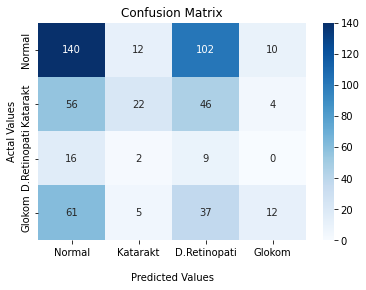

In [23]:
resnet_2 = model_load("resnet_2_224_224_3")
confusion_matrix_and_classification_report(resnet_2)

###3 - ResNet50 - adam

In [ ]:
resnet_3 = resnet50()

resnet_3.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

resnet_3_history = resnet_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
78/78 [==============================] - 14s 151ms/step - loss: 9.4061 - accuracy: 0.3646 - val_loss: 9.2478 - val_accuracy: 0.0769
Epoch 2/20
78/78 [==============================] - 11s 138ms/step - loss: 2.0138 - accuracy: 0.4179 - val_loss: 0.3768 - val_accuracy: 0.7901
Epoch 3/20
78/78 [==============================] - 11s 140ms/step - loss: 1.4911 - accuracy: 0.4555 - val_loss: 0.6782 - val_accuracy: 0.7019
Epoch 4/20
78/78 [==============================] - 11s 141ms/step - loss: 1.1931 - accuracy: 0.5012 - val_loss: 0.5246 - val_accuracy: 0.7869
Epoch 5/20
78/78 [==============================] - 11s 141ms/step - loss: 1.0910 - accuracy: 0.5232 - val_loss: 0.9951 - val_accuracy: 0.5929
Epoch 6/20
78/78 [==============================] - 11s 140ms/step - loss: 1.1415 - accuracy: 0.5088 - val_loss: 0.4929 - val_accuracy: 0.7244
Epoch 7/20
78/78 [==============================] - 11s 140ms/step - loss: 1.1490 - accuracy: 0.5080 - val_loss: 1.1401 - val_accuracy: 0.5064

In [ ]:
loss_9,accuracy_9 = resnet_3.evaluate(X_test,y_test)

17/17 [==============================] - 2s 97ms/step - loss: 1.0166 - accuracy: 0.5655


In [ ]:
history_save("resnet_3_history",resnet_3_history)
model_save(resnet_3,"resnet_3_224_224_3")

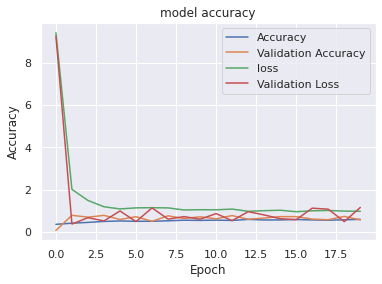

In [ ]:
history_summary(resnet_3_history)

17/17 [==============================] - 2s 96ms/step
              precision    recall  f1-score   support

      Normal       0.54      0.95      0.69       264
    Katarakt       0.70      0.38      0.49       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.80      0.03      0.07       115

    accuracy                           0.57       534
   macro avg       0.51      0.34      0.31       534
weighted avg       0.61      0.57      0.47       534

[[250  13   0   1]
 [ 80  48   0   0]
 [ 26   1   0   0]
 [104   7   0   4]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


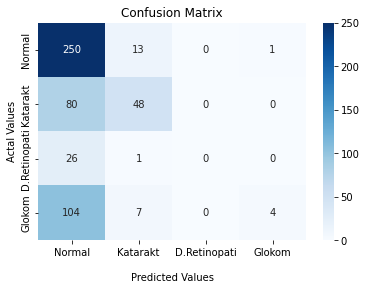

In [24]:
resnet_3 = model_load("resnet_3_224_224_3")
confusion_matrix_and_classification_report(resnet_3)

###4 - ResNet50- Adadelta


In [ ]:
resnet_4 = resnet50()

resnet_4.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adadelta(),
              metrics=['accuracy'])

resnet_4_history = resnet_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
78/78 [==============================] - 15s 156ms/step - loss: 1.2987 - accuracy: 0.4375 - val_loss: 1.3090 - val_accuracy: 0.1715
Epoch 2/20
78/78 [==============================] - 11s 141ms/step - loss: 1.2560 - accuracy: 0.4563 - val_loss: 1.1456 - val_accuracy: 0.4103
Epoch 3/20
78/78 [==============================] - 11s 143ms/step - loss: 1.2390 - accuracy: 0.4736 - val_loss: 1.3494 - val_accuracy: 0.1971
Epoch 4/20
78/78 [==============================] - 11s 145ms/step - loss: 1.2231 - accuracy: 0.4788 - val_loss: 1.3532 - val_accuracy: 0.2756
Epoch 5/20
78/78 [==============================] - 11s 144ms/step - loss: 1.2127 - accuracy: 0.4812 - val_loss: 1.2740 - val_accuracy: 0.3253
Epoch 6/20
78/78 [==============================] - 11s 143ms/step - loss: 1.2029 - accuracy: 0.4908 - val_loss: 1.3601 - val_accuracy: 0.3253
Epoch 7/20
78/78 [==============================] - 11s 142ms/step - loss: 1.1905 - accuracy: 0.4912 - val_loss: 1.2835 - val_accuracy: 0.3349

In [ ]:
loss_10,accuracy_10 = resnet_4.evaluate(X_test,y_test)

17/17 [==============================] - 2s 97ms/step - loss: 1.2186 - accuracy: 0.5056


In [ ]:
history_save("resnet_4_history",resnet_4_history)
model_save(resnet_4,"resnet_4_224_224_3")

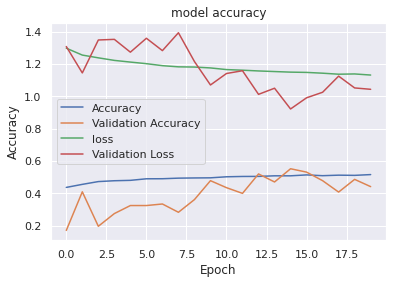

In [ ]:
history_summary(resnet_4_history)

17/17 [==============================] - 3s 94ms/step
              precision    recall  f1-score   support

      Normal       0.50      1.00      0.67       264
    Katarakt       0.70      0.05      0.10       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.51       534
   macro avg       0.30      0.26      0.19       534
weighted avg       0.42      0.51      0.36       534

[[263   1   0   0]
 [120   7   1   0]
 [ 26   1   0   0]
 [112   1   2   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


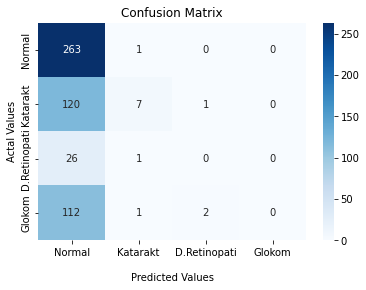

In [25]:
resnet_4 = model_load("resnet_4_224_224_3")
confusion_matrix_and_classification_report(resnet_4)

###5 - ResNet50 - Adagrad

In [ ]:
resnet_5 = resnet50()

resnet_5.compile(optimizer = optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

resnet_5_history = resnet_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
78/78 [==============================] - 16s 146ms/step - loss: 1.9128 - accuracy: 0.4135 - val_loss: 1.5753 - val_accuracy: 0.0000e+00
Epoch 2/20
78/78 [==============================] - 10s 134ms/step - loss: 1.2984 - accuracy: 0.4343 - val_loss: 1.2676 - val_accuracy: 0.0849
Epoch 3/20
78/78 [==============================] - 11s 136ms/step - loss: 1.2748 - accuracy: 0.4455 - val_loss: 1.4949 - val_accuracy: 0.0176
Epoch 4/20
78/78 [==============================] - 11s 137ms/step - loss: 1.2631 - accuracy: 0.4591 - val_loss: 1.4024 - val_accuracy: 0.0865
Epoch 5/20
78/78 [==============================] - 11s 139ms/step - loss: 1.2480 - accuracy: 0.4696 - val_loss: 1.2811 - val_accuracy: 0.1843
Epoch 6/20
78/78 [==============================] - 11s 136ms/step - loss: 1.2359 - accuracy: 0.4768 - val_loss: 1.3360 - val_accuracy: 0.2212
Epoch 7/20
78/78 [==============================] - 11s 137ms/step - loss: 1.2242 - accuracy: 0.4788 - val_loss: 1.3388 - val_accuracy: 0.

In [ ]:
loss_11,accuracy_11 = resnet_5.evaluate(X_test,y_test)

17/17 [==============================] - 2s 97ms/step - loss: 1.2034 - accuracy: 0.5112


In [ ]:
history_save("resnet_5_history",resnet_5_history)
model_save(resnet_5,"resnet_5_224_224_3")

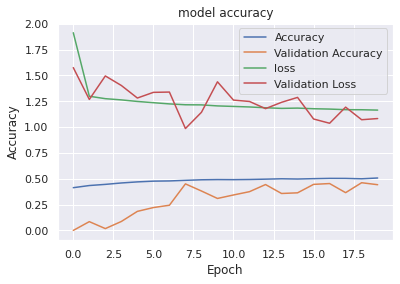

In [ ]:
history_summary(resnet_5_history)

17/17 [==============================] - 2s 95ms/step
              precision    recall  f1-score   support

      Normal       0.51      0.97      0.67       264
    Katarakt       0.57      0.12      0.21       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.51       534
   macro avg       0.27      0.27      0.22       534
weighted avg       0.39      0.51      0.38       534

[[257   6   1   0]
 [110  16   2   0]
 [ 26   1   0   0]
 [108   5   2   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


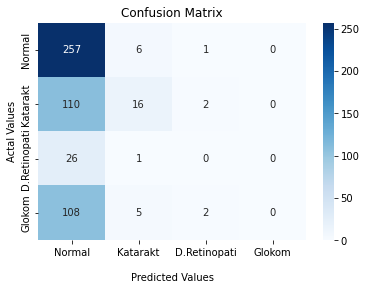

In [26]:
resnet_5 = model_load("resnet_5_224_224_3")
confusion_matrix_and_classification_report(resnet_5)

## VGG16 modellinin farklı parametrelerle eğitilmesi
 224,224,3

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
def vgg16():
  vgg = VGG16(weights="imagenet",include_top = False,input_shape=(224,224,3))
  global class_size
  for layer in vgg.layers:
    layer.trainable = False

  model = Sequential()
  model.add(vgg)
  model.add(Flatten())
  model.add(Dense(class_size,activation="sigmoid"))

  return model

### 1 - VGG16 - SGD

In [ ]:
vgg16_1 = vgg16()

vgg16_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

vgg16_1_history = vgg16_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
78/78 [==============================] - 17s 213ms/step - loss: 1.1802 - accuracy: 0.5196 - val_loss: 0.4887 - val_accuracy: 0.7532
Epoch 2/20
78/78 [==============================] - 17s 215ms/step - loss: 0.9768 - accuracy: 0.6182 - val_loss: 1.8322 - val_accuracy: 0.5401
Epoch 3/20
78/78 [==============================] - 16s 207ms/step - loss: 0.8461 - accuracy: 0.6667 - val_loss: 0.7314 - val_accuracy: 0.7099
Epoch 4/20
78/78 [==============================] - 16s 204ms/step - loss: 0.8187 - accuracy: 0.6815 - val_loss: 0.5557 - val_accuracy: 0.7452
Epoch 5/20
78/78 [==============================] - 16s 204ms/step - loss: 0.7502 - accuracy: 0.7055 - val_loss: 0.6536 - val_accuracy: 0.7340
Epoch 6/20
78/78 [==============================] - 16s 204ms/step - loss: 0.7423 - accuracy: 0.7051 - val_loss: 0.5956 - val_accuracy: 0.7484
Epoch 7/20
78/78 [==============================] - 16s 207ms/step - loss: 0.7152 - accuracy: 0.7224 - val_loss: 0.4135 - val_accuracy: 0.7933

In [ ]:
loss_12,accuracy_12 = vgg16_1.evaluate(X_test,y_test)

17/17 [==============================] - 3s 162ms/step - loss: 0.6852 - accuracy: 0.7360


In [ ]:
history_save("vgg16_1_history",vgg16_1_history)
model_save(vgg16_1,"vgg16_1_224_224_3")

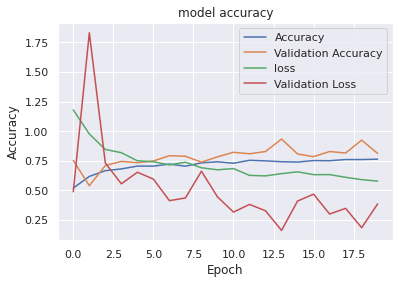

In [ ]:
history_summary(vgg16_1_history)

17/17 [==============================] - 3s 147ms/step
              precision    recall  f1-score   support

      Normal       0.69      0.92      0.79       264
    Katarakt       0.87      0.89      0.88       128
D.Retinopati       0.67      0.15      0.24        27
      Glokom       0.72      0.29      0.41       115

    accuracy                           0.74       534
   macro avg       0.74      0.56      0.58       534
weighted avg       0.74      0.74      0.70       534

[[242   9   0  13]
 [ 14 114   0   0]
 [ 23   0   4   0]
 [ 72   8   2  33]] 



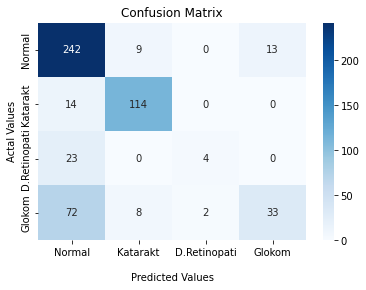

In [27]:
vgg16_1 = model_load("vgg16_1_224_224_3")
confusion_matrix_and_classification_report(vgg16_1)

### 2 - VGG16 -rmsprop

In [ ]:
vgg16_2 = vgg16()

vgg16_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_2_history = vgg16_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 17s 213ms/step - loss: 1.8057 - accuracy: 0.5449 - val_loss: 0.9847 - val_accuracy: 0.7292
Epoch 2/20
78/78 [==============================] - 17s 213ms/step - loss: 1.1868 - accuracy: 0.6402 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 3/20
78/78 [==============================] - 16s 209ms/step - loss: 1.1090 - accuracy: 0.6759 - val_loss: 0.1829 - val_accuracy: 0.9022
Epoch 4/20
78/78 [==============================] - 16s 204ms/step - loss: 1.0311 - accuracy: 0.6935 - val_loss: 0.4082 - val_accuracy: 0.8446
Epoch 5/20
78/78 [==============================] - 16s 204ms/step - loss: 0.9356 - accuracy: 0.7151 - val_loss: 0.0829 - val_accuracy: 0.9567
Epoch 6/20
78/78 [==============================] - 16s 205ms/step - loss: 0.9351 - accuracy: 0.7256 - val_loss: 0.0823 - val_accuracy: 0.9792
Epoch 7/20
78/78 [==============================] - 16s 207ms/step - loss: 0.8304 - accuracy: 0.7444 - val_loss: 0.0957 - val_accuracy: 0.9679

In [ ]:
loss_13,accuracy_13 = vgg16_2.evaluate(X_test,y_test)

17/17 [==============================] - 3s 162ms/step - loss: 0.8325 - accuracy: 0.7640


In [ ]:
history_save("vgg16_2_history",vgg16_2_history)
model_save(vgg16_2,"vgg16_2_224_224_3")

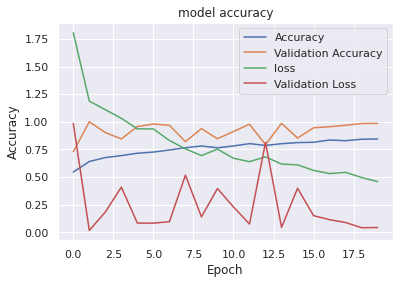

In [ ]:
history_summary(vgg16_2_history)

17/17 [==============================] - 3s 150ms/step
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       264
    Katarakt       0.00      0.00      0.00       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.49       534
   macro avg       0.12      0.25      0.17       534
weighted avg       0.24      0.49      0.33       534

[[264   0   0   0]
 [128   0   0   0]
 [ 27   0   0   0]
 [115   0   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


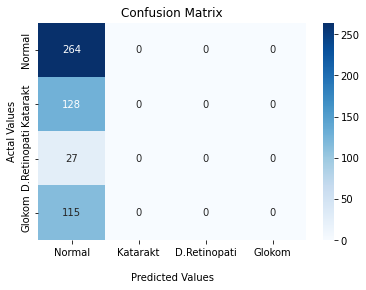

In [21]:
vgg16_2 = model_load("vgg16_2_224_224_3")
confusion_matrix_and_classification_report(vgg16_2)

### 3 - VGG16 -adam

In [ ]:
vgg16_3 = vgg16()

vgg16_3.compile(optimizer= 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_3_history = vgg16_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

58900480/58889256 [==============================] - 3s 0us/step
Epoch 1/20
78/78 [==============================] - 22s 242ms/step - loss: 0.9157 - accuracy: 0.6611 - val_loss: 0.3526 - val_accuracy: 0.8157
Epoch 2/20
78/78 [==============================] - 16s 210ms/step - loss: 0.6123 - accuracy: 0.7584 - val_loss: 0.2264 - val_accuracy: 0.8718
Epoch 3/20
78/78 [==============================] - 16s 205ms/step - loss: 0.5249 - accuracy: 0.7949 - val_loss: 0.3942 - val_accuracy: 0.8253
Epoch 4/20
78/78 [==============================] - 16s 205ms/step - loss: 0.4588 - accuracy: 0.8181 - val_loss: 0.5081 - val_accuracy: 0.7853
Epoch 5/20
78/78 [==============================] - 16s 205ms/step - loss: 0.4413 - accuracy: 0.8269 - val_loss: 0.0913 - val_accuracy: 0.9663
Epoch 6/20
78/78 [==============================] - 16s 208ms/step - loss: 0.3645 - accuracy: 0.8566 - val_loss: 0.1001 - val_accuracy: 0.9663
Epoch 7/20
78/78 [==============================] - 16s 207ms/step - loss: 0.

In [ ]:
loss_14,accuracy_14 = vgg16_3.evaluate(X_test,y_test)

17/17 [==============================] - 5s 295ms/step - loss: 0.4391 - accuracy: 0.8596


In [ ]:
history_save("vgg16_3_history",vgg16_3_history)
model_save(vgg16_3,"vgg16_3_224_224_3")

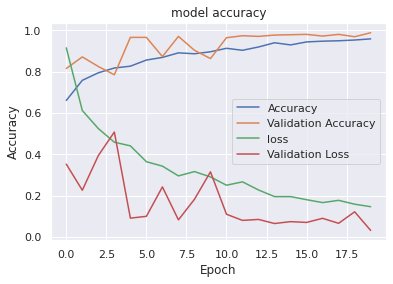

In [ ]:
history_summary(vgg16_3_history)

17/17 [==============================] - 2s 147ms/step
              precision    recall  f1-score   support

      Normal       0.90      0.87      0.88       264
    Katarakt       0.92      0.95      0.94       128
D.Retinopati       0.56      0.85      0.68        27
      Glokom       0.79      0.74      0.77       115

    accuracy                           0.86       534
   macro avg       0.80      0.85      0.82       534
weighted avg       0.87      0.86      0.86       534

[[229   6   7  22]
 [  4 122   2   0]
 [  4   0  23   0]
 [ 17   4   9  85]] 



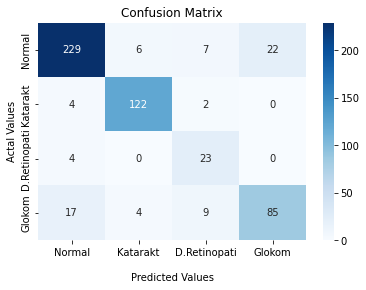

In [28]:
vgg16_3 = model_load("vgg16_3_224_224_3")
confusion_matrix_and_classification_report(vgg16_3)

### 4 - VGG16 -Adadelta

In [ ]:
vgg16_4 = vgg16()

vgg16_4.compile(optimizer= optimizers.Adadelta(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_4_history = vgg16_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/20
78/78 [==============================] - 32s 215ms/step - loss: 1.7226 - accuracy: 0.1867 - val_loss: 1.3877 - val_accuracy: 0.0481
Epoch 2/20
78/78 [==============================] - 15s 187ms/step - loss: 1.5350 - accuracy: 0.1899 - val_loss: 1.3704 - val_accuracy: 0.1282
Epoch 3/20
78/78 [==============================] - 15s 190ms/step - loss: 1.4149 - accuracy: 0.2059 - val_loss: 1.3581 - val_accuracy: 0.2340
Epoch 4/20
78/78 [==============================] - 15s 193ms/step - loss: 1.3422 - accuracy: 0.3401 - val_loss: 1.3530 - val_accuracy: 0.2853
Epoch 5/20
78/78 [==============================] - 15s 199ms/step - loss: 1.2997 - accuracy: 0.4515 - val_loss: 1.3350 - val_accuracy: 0.3157
Epoch 6/20
78/78 [==============================] - 16s 204ms/step - loss: 1.2725 - accuracy: 0.4812 - val_loss: 1.3070 - val_accuracy: 0.3381
Epoch 7/20
78/78 [==============================] - 16s 203ms/step - loss: 1.

In [ ]:
loss_15,accuracy_15 = vgg16_4.evaluate(X_test,y_test)

17/17 [==============================] - 5s 292ms/step - loss: 1.0993 - accuracy: 0.5019


In [ ]:
history_save("vgg16_4_history",vgg16_4_history)
model_save(vgg16_4,"vgg16_4_224_224_3")

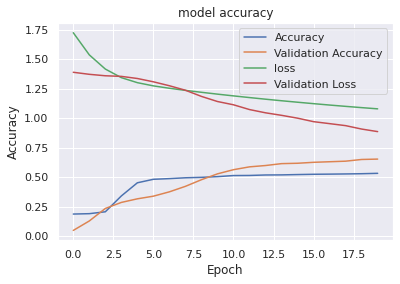

In [ ]:
history_summary(vgg16_4_history)

17/17 [==============================] - 3s 150ms/step
              precision    recall  f1-score   support

      Normal       0.50      1.00      0.66       264
    Katarakt       0.00      0.00      0.00       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       1.00      0.03      0.07       115

    accuracy                           0.50       534
   macro avg       0.37      0.26      0.18       534
weighted avg       0.46      0.50      0.34       534

[[264   0   0   0]
 [128   0   0   0]
 [ 27   0   0   0]
 [111   0   0   4]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


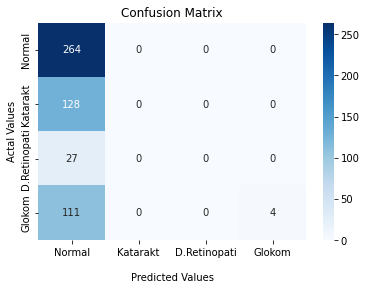

In [29]:
vgg16_4 = model_load("vgg16_4_224_224_3")
confusion_matrix_and_classification_report(vgg16_4)

### 5 - VGG16 - Adagrad

In [ ]:
vgg16_5 = vgg16()

vgg16_5.compile(optimizer= optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_5_history = vgg16_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 17s 204ms/step - loss: 1.0539 - accuracy: 0.5757 - val_loss: 0.6688 - val_accuracy: 0.6971
Epoch 2/20
78/78 [==============================] - 16s 204ms/step - loss: 0.8618 - accuracy: 0.6775 - val_loss: 0.6015 - val_accuracy: 0.7244
Epoch 3/20
78/78 [==============================] - 16s 204ms/step - loss: 0.8036 - accuracy: 0.7035 - val_loss: 0.4134 - val_accuracy: 0.7853
Epoch 4/20
78/78 [==============================] - 16s 201ms/step - loss: 0.7625 - accuracy: 0.7175 - val_loss: 0.5206 - val_accuracy: 0.7564
Epoch 5/20
78/78 [==============================] - 15s 199ms/step - loss: 0.7392 - accuracy: 0.7220 - val_loss: 0.5256 - val_accuracy: 0.7516
Epoch 6/20
78/78 [==============================] - 16s 199ms/step - loss: 0.7204 - accuracy: 0.7352 - val_loss: 0.4177 - val_accuracy: 0.7949
Epoch 7/20
78/78 [==============================] - 16s 202ms/step - loss: 0.6985 - accuracy: 0.7324 - val_loss: 0.4481 - val_accuracy: 0.7821

In [ ]:
loss_16,accuracy_16 = vgg16_5.evaluate(X_test,y_test)

17/17 [==============================] - 3s 159ms/step - loss: 0.6888 - accuracy: 0.7266


In [ ]:
history_save("vgg16_5_history",vgg16_5_history)
model_save(vgg16_5,"vgg16_5_224_224_3")

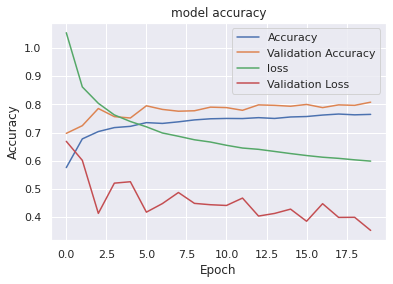

In [ ]:
history_summary(vgg16_5_history)

17/17 [==============================] - 3s 149ms/step
              precision    recall  f1-score   support

      Normal       0.72      0.83      0.77       264
    Katarakt       0.80      0.94      0.86       128
D.Retinopati       0.57      0.15      0.24        27
      Glokom       0.62      0.39      0.48       115

    accuracy                           0.73       534
   macro avg       0.68      0.58      0.59       534
weighted avg       0.71      0.73      0.70       534

[[219  17   1  27]
 [  8 120   0   0]
 [ 23   0   4   0]
 [ 55  13   2  45]] 



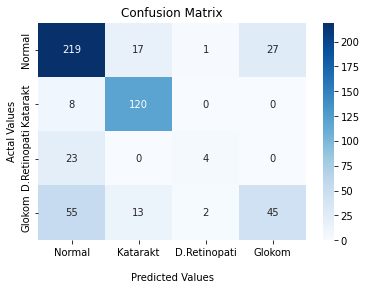

In [30]:
vgg16_5 = model_load("vgg16_5_224_224_3")
confusion_matrix_and_classification_report(vgg16_5)

## VGG19 modelinin farkl parametrelerle eğitilmesi

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
def vgg19():
  vgg = VGG19(weights="imagenet",include_top = False,input_shape=(224,224,3))
  for layer in vgg.layers:
    layer.trainable = False

  model = Sequential()
  model.add(vgg)
  model.add(Flatten())
  model.add(Dense(class_size,activation="sigmoid"))

  return model

### 1 - VGG19 - SGD

In [ ]:
vgg19_1 = vgg19()

vgg19_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

vgg19_1_history = vgg19_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

80150528/80134624 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
78/78 [==============================] - 32s 250ms/step - loss: 1.4654 - accuracy: 0.4836 - val_loss: 0.6719 - val_accuracy: 0.7115
Epoch 2/20
78/78 [==============================] - 18s 228ms/step - loss: 0.9628 - accuracy: 0.6154 - val_loss: 0.6323 - val_accuracy: 0.7196
Epoch 3/20
78/78 [==============================] - 18s 229ms/step - loss: 0.9750 - accuracy: 0.6142 - val_loss: 0.8331 - val_accuracy: 0.6987
Epoch 4/20
78/78 [==============================] - 18s 230ms/step - loss: 0.8424 - accuracy: 0.6699 - val_loss: 0.5850 - val_accuracy: 0.7500
Epoch 5/20
78/78 [==============================] - 18s 228ms/step - loss: 0.8516 - accuracy: 0.6719 - val_loss: 0.8462 - val_accuracy: 0.7019
Epoch 6/20
78/78 [==============================] - 18s 227ms/step - loss: 0.8251 - accuracy: 0.6811 - val_loss: 0.3994 - val_accuracy: 0.7917
Epoch 7/20
78/78 [==============================] - 18s 228ms/step - loss: 0.7820 - accuracy: 0.6931 - val_loss: 0.4539 - val_accuracy: 0.7837

In [ ]:
loss_13,accuracy_13 = vgg19_1.evaluate(X_test,y_test)

17/17 [==============================] - 5s 307ms/step - loss: 0.7605 - accuracy: 0.7097


In [ ]:
history_save("vgg19_1_history",vgg19_1_history)
model_save(vgg19_1,"vgg19_1_224_224_3")

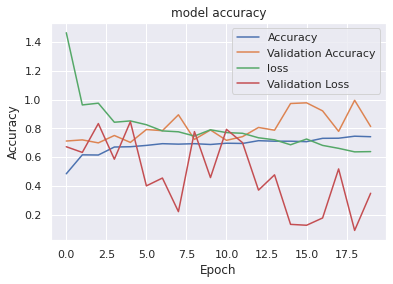

In [ ]:
history_summary(vgg19_1_history)

17/17 [==============================] - 3s 174ms/step
              precision    recall  f1-score   support

      Normal       0.70      0.87      0.77       264
    Katarakt       0.76      0.98      0.85       128
D.Retinopati       0.56      0.19      0.28        27
      Glokom       0.62      0.17      0.27       115

    accuracy                           0.71       534
   macro avg       0.66      0.55      0.54       534
weighted avg       0.69      0.71      0.66       534

[[229  22   1  12]
 [  3 125   0   0]
 [ 22   0   5   0]
 [ 74  18   3  20]] 



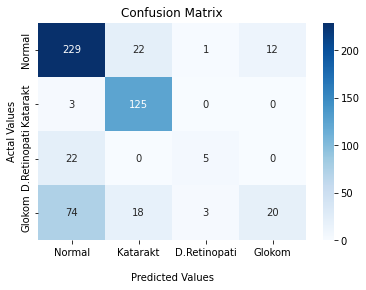

In [31]:
vgg19_1 = model_load("vgg19_1_224_224_3")
confusion_matrix_and_classification_report(vgg19_1)

### 2 - VGG19 - rmsprop

In [ ]:
vgg19_2 = vgg19()

vgg19_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_2_history = vgg19_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 21s 254ms/step - loss: 2.3548 - accuracy: 0.5104 - val_loss: 0.9453 - val_accuracy: 0.7292
Epoch 2/20
78/78 [==============================] - 18s 232ms/step - loss: 1.6651 - accuracy: 0.5893 - val_loss: 0.4959 - val_accuracy: 0.8189
Epoch 3/20
78/78 [==============================] - 18s 229ms/step - loss: 1.5359 - accuracy: 0.6310 - val_loss: 0.9950 - val_accuracy: 0.7452
Epoch 4/20
78/78 [==============================] - 18s 227ms/step - loss: 1.3036 - accuracy: 0.6575 - val_loss: 0.4467 - val_accuracy: 0.8109
Epoch 5/20
78/78 [==============================] - 18s 228ms/step - loss: 1.2977 - accuracy: 0.6707 - val_loss: 0.0396 - val_accuracy: 0.9888
Epoch 6/20
78/78 [==============================] - 18s 229ms/step - loss: 1.2958 - accuracy: 0.6667 - val_loss: 2.8706 - val_accuracy: 0.6490
Epoch 7/20
78/78 [==============================] - 18s 229ms/step - loss: 1.2909 - accuracy: 0.6807 - val_loss: 0.0146 - val_accuracy: 0.9984

In [ ]:
loss_14,accuracy_14 = vgg19_2.evaluate(X_test,y_test)

17/17 [==============================] - 3s 178ms/step - loss: 0.8547 - accuracy: 0.7416


In [ ]:
history_save("vgg19_2_history",vgg19_2_history)
model_save(vgg19_2,"vgg19_2_224_224_3")

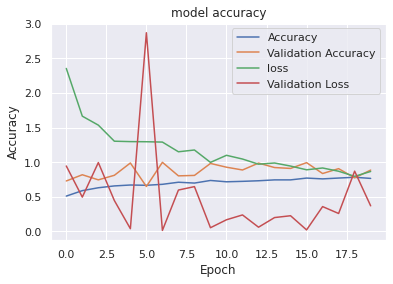

In [ ]:
history_summary(vgg19_2_history)

17/17 [==============================] - 3s 174ms/step
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       264
    Katarakt       0.00      0.00      0.00       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.49       534
   macro avg       0.12      0.25      0.17       534
weighted avg       0.24      0.49      0.33       534

[[264   0   0   0]
 [128   0   0   0]
 [ 27   0   0   0]
 [115   0   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


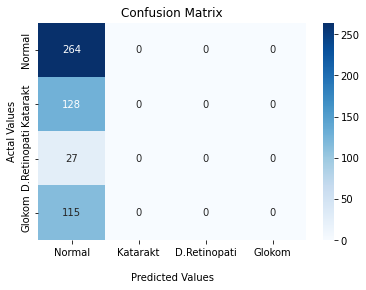

In [32]:
vgg19_2 = model_load("vgg19_2_224_224_3")
confusion_matrix_and_classification_report(vgg19_2)

### 3 - VGG19 - adam 

In [ ]:
vgg19_3 = vgg19()

vgg19_3.compile(optimizer= 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_3_history = vgg19_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 19s 235ms/step - loss: 1.0773 - accuracy: 0.6206 - val_loss: 0.7632 - val_accuracy: 0.7420
Epoch 2/20
78/78 [==============================] - 18s 231ms/step - loss: 0.6870 - accuracy: 0.7268 - val_loss: 0.3107 - val_accuracy: 0.8237
Epoch 3/20
78/78 [==============================] - 18s 229ms/step - loss: 0.6153 - accuracy: 0.7440 - val_loss: 0.2988 - val_accuracy: 0.8253
Epoch 4/20
78/78 [==============================] - 18s 227ms/step - loss: 0.5162 - accuracy: 0.7949 - val_loss: 0.1991 - val_accuracy: 0.9119
Epoch 5/20
78/78 [==============================] - 18s 227ms/step - loss: 0.5776 - accuracy: 0.7660 - val_loss: 0.3435 - val_accuracy: 0.8189
Epoch 6/20
78/78 [==============================] - 18s 229ms/step - loss: 0.5126 - accuracy: 0.8089 - val_loss: 0.1707 - val_accuracy: 0.9022
Epoch 7/20
78/78 [==============================] - 18s 229ms/step - loss: 0.4294 - accuracy: 0.8321 - val_loss: 0.7612 - val_accuracy: 0.7388

In [ ]:
loss_15,accuracy_15 = vgg19_3.evaluate(X_test,y_test)

17/17 [==============================] - 3s 178ms/step - loss: 0.5182 - accuracy: 0.8165


In [ ]:
history_save("vgg19_3_history",vgg19_3_history)
model_save(vgg19_3,"vgg19_3_224_224_3")

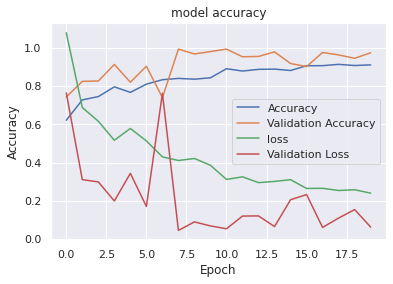

In [ ]:
history_summary(vgg19_3_history)

17/17 [==============================] - 3s 174ms/step
              precision    recall  f1-score   support

      Normal       0.86      0.80      0.83       264
    Katarakt       0.92      0.93      0.93       128
D.Retinopati       0.67      0.59      0.63        27
      Glokom       0.66      0.77      0.71       115

    accuracy                           0.82       534
   macro avg       0.78      0.77      0.77       534
weighted avg       0.82      0.82      0.82       534

[[212   7   2  43]
 [  7 119   0   2]
 [ 11   0  16   0]
 [ 17   3   6  89]] 



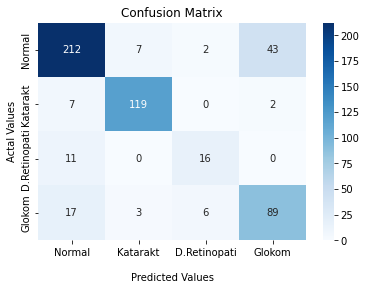

In [33]:
vgg19_3 = model_load("vgg19_3_224_224_3")
confusion_matrix_and_classification_report(vgg19_3)

### 4 - VGG19 - ADADELTA

In [ ]:
vgg19_4 = vgg19()

vgg19_4.compile(optimizer= optimizers.Adadelta(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_4_history = vgg19_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/20
78/78 [==============================] - 33s 238ms/step - loss: 1.4631 - accuracy: 0.2404 - val_loss: 2.0880 - val_accuracy: 0.0000e+00
Epoch 2/20
78/78 [==============================] - 17s 216ms/step - loss: 1.3370 - accuracy: 0.4022 - val_loss: 1.7817 - val_accuracy: 0.0160
Epoch 3/20
78/78 [==============================] - 17s 218ms/step - loss: 1.2841 - accuracy: 0.4327 - val_loss: 1.5994 - val_accuracy: 0.0625
Epoch 4/20
78/78 [==============================] - 17s 222ms/step - loss: 1.2558 - accuracy: 0.4423 - val_loss: 1.4807 - val_accuracy: 0.1458
Epoch 5/20
78/78 [==============================] - 18s 228ms/step - loss: 1.2360 - accuracy: 0.4571 - val_loss: 1.3996 - val_accuracy: 0.2228
Epoch 6/20
78/78 [==============================] - 18s 231ms/step - loss: 1.2198 - accuracy: 0.4663 - val_loss: 1.3275 - val_accuracy: 0.2901
Epoch 7/20
78/78 [==============================] - 18s 234ms/step - loss

In [ ]:
loss_16,accuracy_16 = vgg19_4.evaluate(X_test,y_test)

17/17 [==============================] - 5s 330ms/step - loss: 1.0847 - accuracy: 0.5206


In [ ]:
history_save("vgg19_4_history",vgg19_4_history)
model_save(vgg19_4,"vgg19_4_224_224_3")

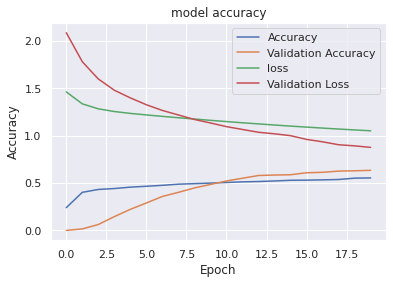

In [ ]:
history_summary(vgg19_4_history)

17/17 [==============================] - 3s 174ms/step
              precision    recall  f1-score   support

      Normal       0.51      0.97      0.67       264
    Katarakt       0.87      0.10      0.18       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.59      0.09      0.15       115

    accuracy                           0.52       534
   macro avg       0.49      0.29      0.25       534
weighted avg       0.59      0.52      0.41       534

[[255   2   0   7]
 [115  13   0   0]
 [ 27   0   0   0]
 [105   0   0  10]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


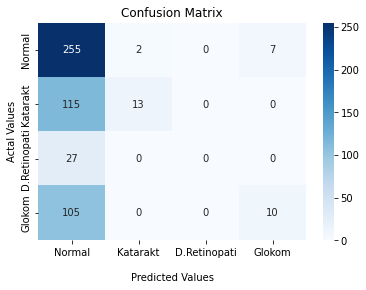

In [34]:
vgg19_4 = model_load("vgg19_4_224_224_3")
confusion_matrix_and_classification_report(vgg19_4)

### 5 - VGG19 - Adagrad

In [ ]:
vgg19_5 = vgg19()

vgg19_5.compile(optimizer= optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_5_history = vgg19_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
78/78 [==============================] - 21s 256ms/step - loss: 1.0924 - accuracy: 0.5593 - val_loss: 0.6542 - val_accuracy: 0.6971
Epoch 2/20
78/78 [==============================] - 20s 252ms/step - loss: 0.8735 - accuracy: 0.6655 - val_loss: 0.6388 - val_accuracy: 0.7147
Epoch 3/20
78/78 [==============================] - 19s 247ms/step - loss: 0.8163 - accuracy: 0.6943 - val_loss: 0.4953 - val_accuracy: 0.7612
Epoch 4/20
78/78 [==============================] - 19s 244ms/step - loss: 0.7866 - accuracy: 0.6943 - val_loss: 0.3689 - val_accuracy: 0.8157
Epoch 5/20
78/78 [==============================] - 19s 246ms/step - loss: 0.7597 - accuracy: 0.7027 - val_loss: 0.5739 - val_accuracy: 0.7500
Epoch 6/20
78/78 [==============================] - 19s 249ms/step - loss: 0.7394 - accuracy: 0.7063 - val_loss: 0.4520 - val_accuracy: 0.7724
Epoch 7/20
78/78 [==============================] - 19s 248ms/step - loss: 0.7278 - accuracy: 0.7123 - val_loss: 0.4705 - val_accuracy: 0.7692

In [ ]:
loss_17,accuracy_17 = vgg19_5.evaluate(X_test,y_test)

17/17 [==============================] - 3s 196ms/step - loss: 0.7065 - accuracy: 0.7228


In [ ]:
history_save("vgg19_5_history",vgg19_5_history)
model_save(vgg19_5,"vgg19_5_224_224_3")

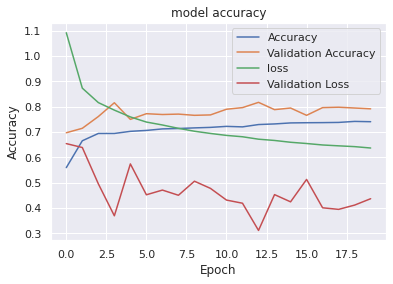

In [ ]:
history_summary(vgg19_5_history)

17/17 [==============================] - 3s 173ms/step
              precision    recall  f1-score   support

      Normal       0.70      0.87      0.77       264
    Katarakt       0.82      0.94      0.88       128
D.Retinopati       0.33      0.04      0.07        27
      Glokom       0.64      0.30      0.41       115

    accuracy                           0.72       534
   macro avg       0.62      0.54      0.53       534
weighted avg       0.70      0.72      0.68       534

[[230  16   0  18]
 [  6 120   0   2]
 [ 26   0   1   0]
 [ 68  10   2  35]] 



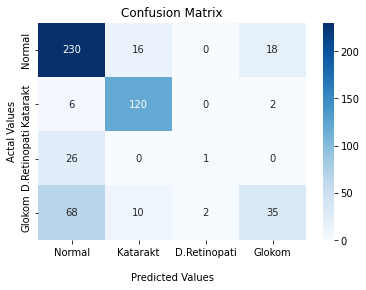

In [35]:
vgg19_5 = model_load("vgg19_5_224_224_3")
confusion_matrix_and_classification_report(vgg19_5)

# Modellerin Karşılaştırılması

In [ ]:
def degerlendirme(model,X,y):
  return model.evaluate(X,y)

In [ ]:
alexnet_1 = model_load("alexnet_1_224_224_3") # SGD
alexnet_6 = model_load("alexnet_6_224_224_3") # Adagrad
alexnet_2 = model_load("alexnet_2_224_224_3") # RMSprop
alexnet_5 = model_load("alexnet_5_224_224_3") #Adadelta
alexnet_3 = model_load("alexnet_3_224_224_3") # Adam

resnet_1 = model_load("resnet_1_224_224_3") # SGD
resnet_5 = model_load("resnet_5_224_224_3") # Adagrad
resnet_2 = model_load("resnet_2_224_224_3") # RMSprop
resnet_4 = model_load("resnet_4_224_224_3") # Adadelta
resnet_3 = model_load("resnet_3_224_224_3") # Adam


In [ ]:
# Test verisi için doğruluk yuzdesi hesaplama

alexnet_eva_1 = round(degerlendirme(alexnet_1,X_test,y_test)[1],4)
alexnet_eva_6 = round(degerlendirme(alexnet_6,X_test,y_test)[1],4)
alexnet_eva_2 = round(degerlendirme(alexnet_2,X_test,y_test)[1],4)
alexnet_eva_5 = round(degerlendirme(alexnet_5,X_test,y_test)[1],4)
alexnet_eva_3 = round(degerlendirme(alexnet_3,X_test,y_test)[1],4)


32/32 [==============================] - 1s 29ms/step - loss: 0.9092 - accuracy: 0.6038


In [ ]:
resnet_eva_1 = round(degerlendirme(resnet_1,X_test,y_test)[1],4)
resnet_eva_5 = round(degerlendirme(resnet_5,X_test,y_test)[1],4)
resnet_eva_2 = round(degerlendirme(resnet_2,X_test,y_test)[1],4)
resnet_eva_4 = round(degerlendirme(resnet_4,X_test,y_test)[1],4)
resnet_eva_3 = round(degerlendirme(resnet_3,X_test,y_test)[1],4)

32/32 [==============================] - 8s 202ms/step - loss: 0.9418 - accuracy: 0.6077


In [ ]:
data = [[alexnet_eva_1,alexnet_eva_6,alexnet_eva_2,alexnet_eva_5,alexnet_eva_3],
                [resnet_eva_1,resnet_eva_5,resnet_eva_2,resnet_eva_4,resnet_eva_3]]
                
data

[[0.5988, 0.6146, 0.6057, 0.5949, 0.6038],
 [0.6028, 0.5998, 0.3715, 0.6008, 0.6077]]

In [ ]:
columns =  ['SGD', 'Adagrad', 'RMSprop','Adadelta','Adam']

print("Test verisi için acc değerlerinin model özeti\n")
sonuc = pd.DataFrame(data=data, index = ['AlexNet','ResNet50'], columns = columns)
sonuc

Test verisi için acc değerlerinin model özeti



,SGD,Adagrad,RMSprop,Adadelta,Adam
AlexNet,0.5988,0.6146,0.6057,0.5949,0.6038
ResNet50,0.6028,0.5998,0.3715,0.6008,0.6077
